In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np

from matplotlib import ticker
from matplotlib.pyplot import MultipleLocator
import os

import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [45]:
file_path = 'output_SIRD/20220720_2040'
sird_fname = os.path.join(file_path, 'sird_results.csv')
params_fname = os.path.join(file_path, 'params_results.csv')
loss_fname = os.path.join(file_path, 'loss_results.csv')

sird_df = pd.read_csv(sird_fname)
params_df = pd.read_csv(params_fname)
loss_df = pd.read_csv(loss_fname)

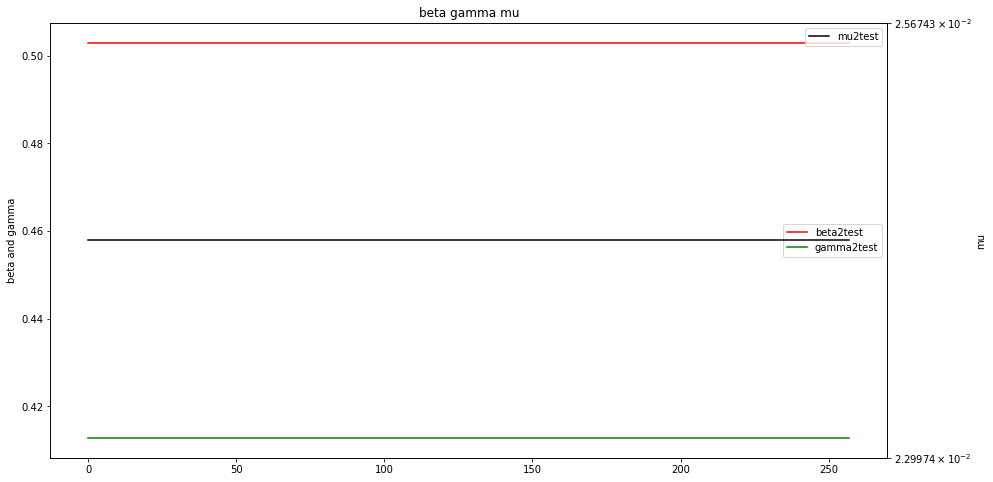

<Figure size 432x288 with 0 Axes>

In [46]:
filename2 = os.path.join(file_path, 'params_results.csv')
params_df = pd.read_csv(filename2)
# print(df2.head())

fig = plt.figure(figsize=(15, 8))
ax1 = fig.add_subplot(111)
ax1.plot(params_df['beta2test'], color='red', label='beta2test')
ax1.plot(params_df['gamma2test'], color='green', label='gamma2test')
ax1.set_ylabel('beta and gamma')
# ax1.set_yticks(np.arange(0, 0.35, 0.05)) 
# ax1.set_ylim(0, 0.30)
ax1.legend(loc='best')
ax2 = ax1.twinx()
ax2.plot(params_df['mu2test'], color='black', label='mu2test')
ax2.set_ylabel('mu')
# ax2.set_yticks(np.arange(0, 0.003,0.0005)) 
ax2.set_yscale('symlog')
# ax2.set_ylim([0, 5.0 * 0.001])
# ax2.set_ylim(0, 5.0 * 0.001)
ax2.legend(loc='best')

# beta = plt.plot(params_df['beta2test'], color='red', label='beta2test')
# gamma = plt.plot(params_df['gamma2test'], color='green', label='gamma2test')
# mu = plt.plot(params_df['mu2test'], color='black', label='mu2test')
# plt.ylim(0, 0.01)
# plt.legend(loc='best')
plt.title('beta gamma mu')
# plt.savefig('./figures/total_confirmed.png')
plt.show(block=False)
plt.savefig(file_path + '/params.png', dpi=400, bbox_inches='tight')    

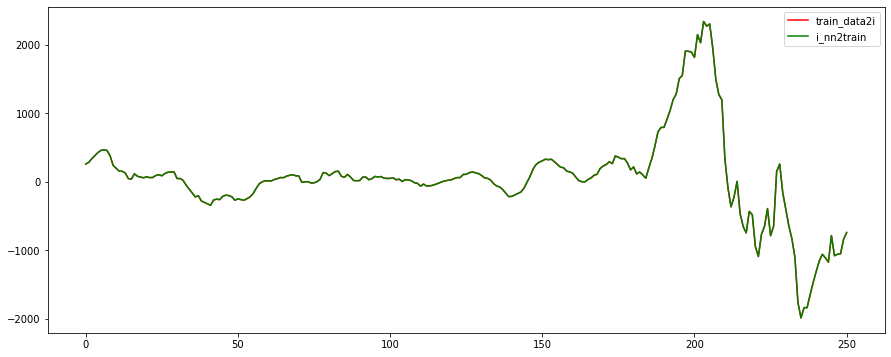

In [29]:
plt.figure(figsize=(15, 6))

# train_data2s   = plt.plot(sird_df['ds_dt'], color='red', label='train_data2s')
# s_nn2train   = plt.plot(sird_df['pre_s2t'], color='green', label='s_nn2train  ')

train_data2i   = plt.plot(sird_df['di_dt'], color='red', label='train_data2i')
i_nn2train   = plt.plot(sird_df['pre_i2t'], color='green', label='i_nn2train  ')

# train_data2r   = plt.plot(sird_df['dr_dt'], color='red', label='train_data2r')
# r_nn2train   = plt.plot(sird_df['pre_r2t'], color='green', label='r_nn2train  ')
plt.legend(loc='best')
# plt.title('s i r d loss')
# plt.savefig('./figures/total_confirmed.png')
plt.show(block=False)

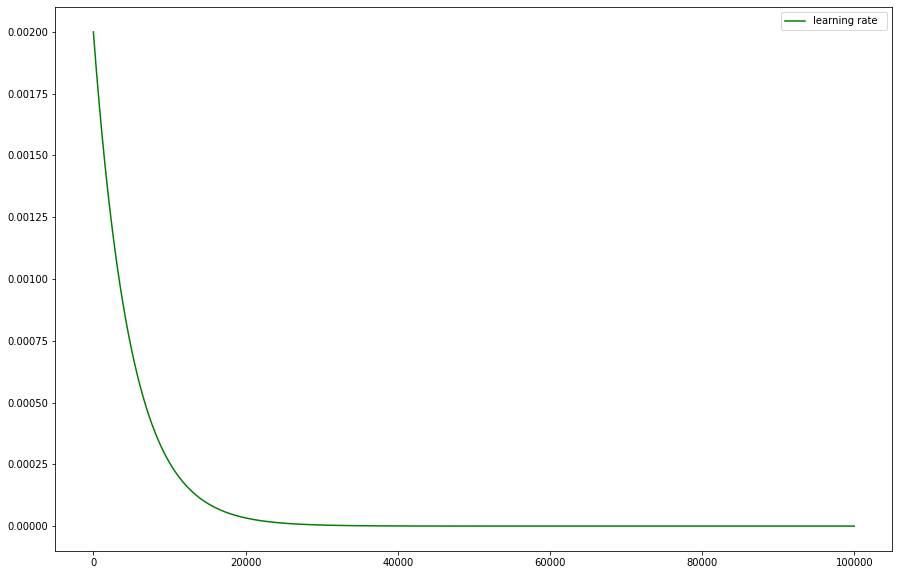

In [38]:
plt.figure(figsize=(15, 10))
# s_loss = plt.plot(loss_df['loss_s'], color='red', label='loss_s')
# i_loss = plt.plot(loss_df['loss_i'], color='green', label='loss_i')
# r_loss = plt.plot(loss_df['loss_r'], color='green', label='loss_r')
lr = plt.plot(loss_df['lr'], color='green', label='learning rate  ')

plt.legend(loc='best')
# plt.title('s i r d loss')
# plt.savefig('./figures/total_confirmed.png')
plt.show(block=False)

In [25]:
filename = './data/minnesota3.csv' 
df = pd.read_csv(filename)
df.head(20)

,date,cum_confirmed,recovered,death
0,01/04/2020,973,310,17
1,02/04/2020,1056,345,18
2,03/04/2020,1119,375,22
3,04/04/2020,1158,416,24
4,05/04/2020,1217,422,29
5,06/04/2020,1330,440,30
6,07/04/2020,1432,515,34
7,08/04/2020,1534,593,39
8,09/04/2020,1637,625,50
9,10/04/2020,1732,675,57


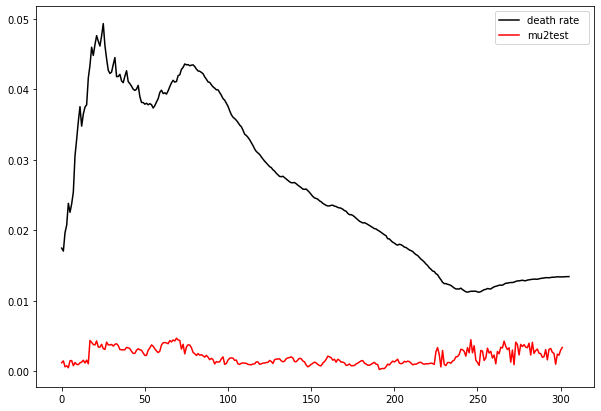

In [26]:
# 1. 死亡人数÷总患病人数
# 2. 死亡人数÷(死亡人数+治愈人数)

df['deate_rate'] =  df['death'] / df['cum_confirmed']
plt.figure(figsize=(10, 7))
death_rate = plt.plot(df['deate_rate'], color='black', label='death rate  ')

plt.plot(params_df['mu2test'], color='red', label='mu2test')

plt.legend(loc='best')
plt.show(block=False)

In [ ]:
import DNN_data
filename = 'data2csv/minnesota3.csv'
date, data2S, data2I, data2R, data2D = DNN_data.load_data(filename, N=3000000)

In [ ]:
import dataUtils
data_list = dataUtils.load_data(filename, N=3450000)
date, data2S, data2I, data2R, data2D, *_ = data_list

In [ ]:
len(date)

306

In [ ]:
import tensorflow as tf
global_steps = tf.Variable(0, trainable=False)
Params = dict()
Params['max_epoch'] = 200000
Params['init_penalty2predict_true'] = 50
pt_penalty_init = Params['init_penalty2predict_true']
# Multiply the penalty decay rate by 0.1 at 100, 150, and 200 epochs.
boundaries = [int(Params['max_epoch'] / 10), int(Params['max_epoch'] / 5), int(Params['max_epoch'] / 4),\
            int(Params['max_epoch'] / 2), int(3 * Params['max_epoch'] / 4)]
values_arr = [1, 10, 50, 100, 200, 500]
# boundaries = [int(batches_per_epoch * epoch) for epoch in boundaries_arr]
values = [pt_penalty_init * decay for decay in values_arr]
temp_penalty_pt = tf.compat.v1.train.piecewise_constant(
                    tf.cast(global_steps, tf.int32), boundaries, values)

In [ ]:
params = dict()
params['freq2SIRD'] = np.concatenate(([1], np.arange(1, 20)), axis=0)

In [ ]:
params['freq2SIRD']

array([ 1,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19])

In [ ]:
import DNN_data
filename = 'data2csv/minnesota3.csv'
date, data2S, data2I, data2R, data2D = DNN_data.load_data(filename, N=3400000)
# 不归一化数据
train_data, test_data = DNN_data.split_data2(date, data2S, data2I, data2R, data2D, train_size=1.0)
# 按顺序取出列表中的数据
train_date, train_data2s, train_data2i, train_data2r, train_data2d, *_ = train_data

In [ ]:
t_batch, s_obs, i_obs, r_obs, d_obs = \
    DNN_data.sample_data(train_date, train_data2s, train_data2i, train_data2r, train_data2d,
                            window_size=7,sampling_opt='sequential_sort')

In [ ]:
t_batch

array([[88.],
       [89.],
       [90.],
       [91.],
       [92.],
       [93.],
       [94.]])

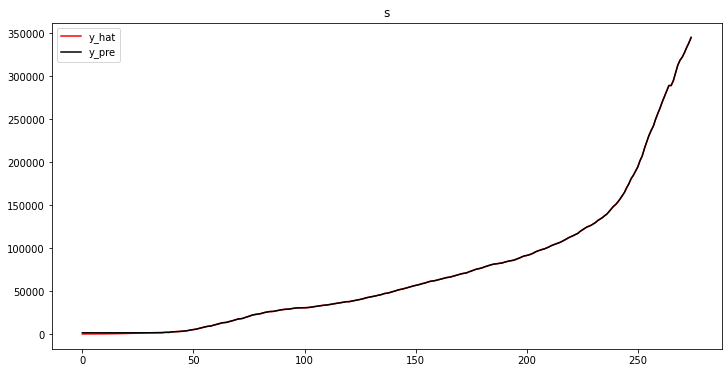

In [ ]:
plt.figure(figsize=(12, 6))
y_hat = plt.plot(3000000 * df2['train_data2i'], color='red', label='y_hat')
y_pre = plt.plot(3000000 * df2['i_nn2train'], color='black', label='y_pre')
plt.legend(loc='best')
plt.title('s')
# plt.savefig('./figures/total_confirmed.png')
plt.show(block=False)

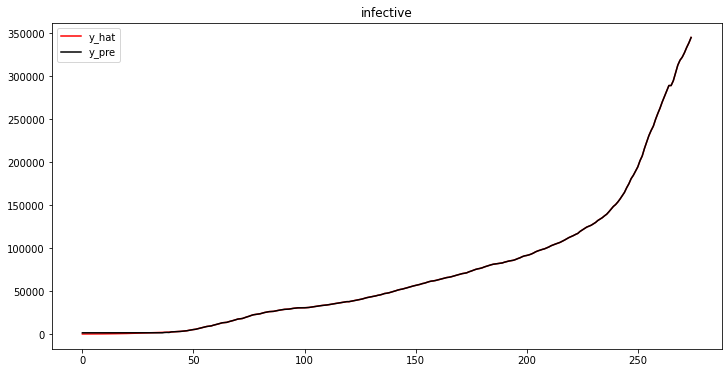

In [ ]:
plt.figure(figsize=(12, 6))
y_hat = plt.plot(3000000 * df2['train_data2i'], color='red', label='y_hat')
y_pre = plt.plot(3000000 * df2['i_nn2train'], color='black', label='y_pre')
plt.legend(loc='best')
plt.title('infective')
# plt.savefig('./figures/total_confirmed.png')
plt.show(block=False)

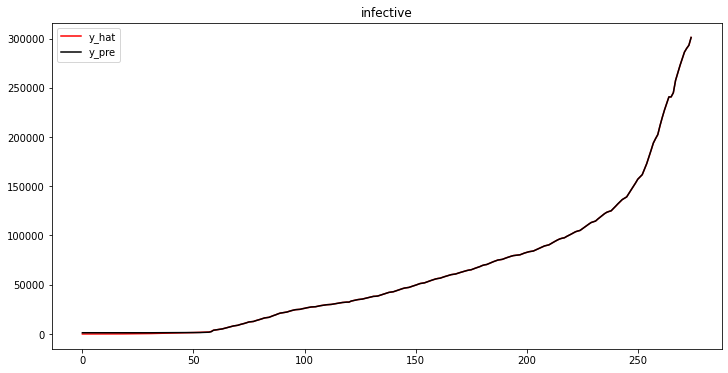

In [ ]:
plt.figure(figsize=(12, 6))
y_hat = plt.plot(3000000 * df2['train_data2r'], color='red', label='y_hat')
y_pre = plt.plot(3000000 * df2['r_nn2train'], color='black', label='y_pre')
plt.legend(loc='best')
plt.title('infective')
# plt.savefig('./figures/total_confirmed.png')
plt.show(block=False)

In [ ]:
df['daily_cases'] = df['cum_confirmed'] - df['cum_confirmed'].shift(1)
df['daily_cases'][0] = df['cum_confirmed'][0]
df['daily_cases'].astype('int')

# df['daily_cases'] = df['daily_cases'].round(0)

0        1
1        1
2        0
3        3
4        6
      ... 
362    779
363    940
364    796
365    946
366    895
Name: daily_cases, Length: 367, dtype: int32

In [ ]:
def load_data2(filename, N=1000000):
    df = pd.read_csv(filename)
    # date_list = np.array(df['date'])
    date_list = [i for i in range(len(df))]
    # infective_list = np.array(df['cum_confirmed'])
    # recovery_list = np.array(df['recovered'])
    # death_list = np.array(df['death'])
    df['pops'] = 0
    for i in df.index:
        df['pops'][i] = N - df['cum_confirmed'][i] - df['recovered'][i] - df['death'][i]

    df['daily_cases'] = df['cum_confirmed'] - df['cum_confirmed'].shift(1)
    df['daily_cases'][0] = df['cum_confirmed'][0]
    df['daily_cases'].astype('int')

    df['daily_recovry'] = df['recovered'] - df['recovered'].shift(1)
    df['daily_recovry'][0] = df['recovered'][0]
    # df['daily_recovry'].astype('int')

    df['daily_death'] = df['death'] - df['death'].shift(1)
    df['daily_death'][0] = df['death'][0]
    # df['daily_death'].astype('int')

    susceptible_list = np.array(df['pops'])
    infective_list = np.array(df['daily_cases'])
    recovery_list = np.array(df['daily_recovry'])
    death_list = np.array(df['daily_death'])

    return df


filename = 'data2csv/minnesota2.csv'
# df = pd.read_csv(filename)

df = load_data2(filename, N=1000000)
df

,date,cum_confirmed,recovered,death,pops,daily_cases,daily_recovry,daily_death
0,06/03/2020,1,0,0,999999,1.0,0.0,0.0
1,07/03/2020,2,0,0,999998,1.0,0.0,0.0
2,08/03/2020,2,0,0,999998,0.0,0.0,0.0
3,09/03/2020,5,0,0,999995,3.0,0.0,0.0
4,10/03/2020,11,0,0,999989,6.0,0.0,0.0
...,...,...,...,...,...,...,...,...
362,03/03/2021,486434,473252,6507,33807,779.0,782.0,17.0
363,04/03/2021,487374,473728,6521,32377,940.0,476.0,14.0
364,05/03/2021,488170,474175,6534,31121,796.0,447.0,13.0
365,06/03/2021,489116,475170,6546,29168,946.0,995.0,12.0


In [ ]:
import tensorflow as tf 
activateFunc = 'relu'
if str.lower(activateFunc) == 'relu':
    activate_func = tf.nn.relu
elif str.lower(activateFunc) == 'leaky_relu':
    activate_func = tf.nn.leaky_relu(0.2)
elif str.lower(activateFunc) == 'tanh':
    activate_func = tf.tanh
elif str.lower(activateFunc) == 'softplus':
    activate_func = tf.nn.softplus
elif str.lower(activateFunc) == 'sigmoid':
    activate_func = tf.nn.sigmoid


print(activate_func)

<function relu at 0x00000282C6346BF8>


## Check Residual

1. The residuals are uncorrelated. If there are correlations between residuals, then there is information left in the residuals which should be used in computing forecasts.
2. The residuals have zero mean. If the residuals have a mean other than zero, then the forecasts are biased.

3. The residuals have constant variance.
4. The residuals are normally distributed.

### 1. check if residuals are uncorrelated

##### The lack of correlation suggesting the forecasts are good

###### a.  Plots visualization

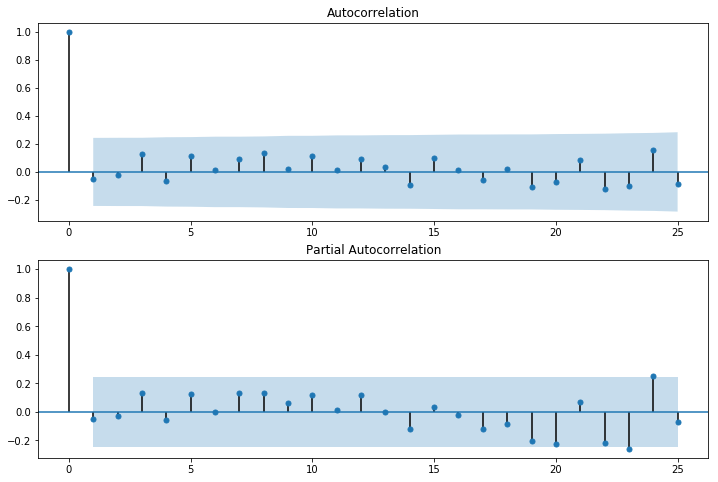

In [ ]:
fig = plt.figure(figsize = (12, 8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(results_mean.resid.values.squeeze(),
                              lags = 25, ax = ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(results_mean.resid.values.squeeze(),
                               lags = 25, ax = ax2)
# plt.savefig('ARIMA/ACF and PACF _residual_USA.pdf')
plt.show()

###### b. Using Durbin-Watson 

Using Durbin-Watson (only for first order diffferencing  ??)

0<= DW<= 4 DW = 0 => p = 1 positive autocorrelation

DW = 4 => p =-1 negative autocorrelation

DW = 2 => p = 0 no autocorrelation

Durbin Watson Statistic Definition By WILL KENTON Updated Jul 18, 2019 What Is the Durbin Watson Statistic? The Durbin Watson (DW) statistic is a test for autocorrelation in the residuals from a statistical regression analysis. The Durbin-Watson statistic will always have a value between 0 and 4. A value of 2.0 means that there is no autocorrelation detected in the sample. Values from 0 to less than 2 indicate positive autocorrelation and values from from 2 to 4 indicate negative autocorrelation.

In [ ]:
print(sm.stats.durbin_watson(results_mean.resid.values))

2.039689051323683


### 2. Check if residuals are normal distributed

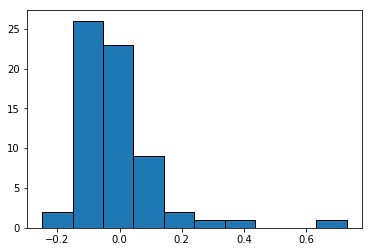

In [ ]:
plt.hist(results_mean.resid.values.squeeze(), bins=10, edgecolor = 'black') 
plt.show()

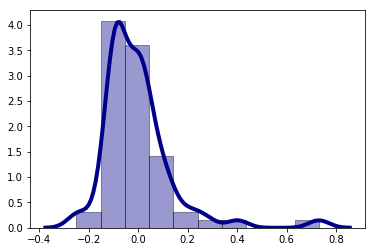

In [ ]:
import seaborn as sns
# Density Plot and Histogram of all arrival delays
sns.distplot(results_mean.resid.values.squeeze(), hist=True, kde=True, 
             bins=10, color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
# plt.savefig('ARIMA/Histogram_residual_USA.pdf')
plt.show()

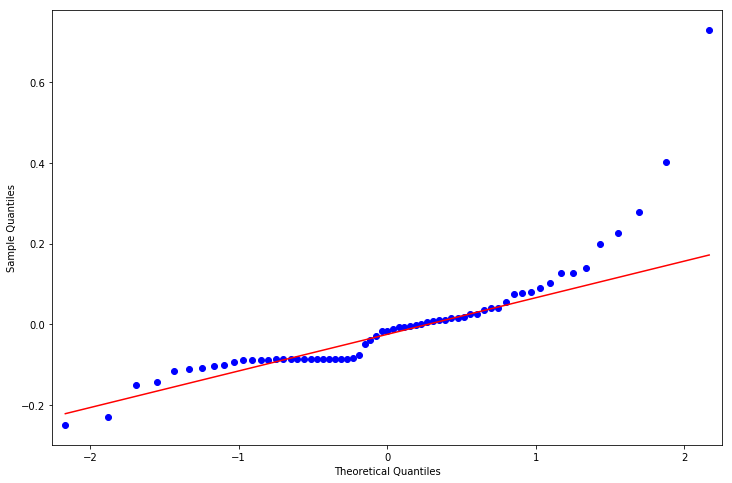

In [ ]:
fig = plt.figure(figsize= (12,8))
ax1 = fig.add_subplot(111)
fig = qqplot(results_mean.resid, ax = ax1, line='q')
# plt.savefig('ARIMA/ggplot_residual_USA.pdf')
plt.show()

### 4. Check if residuals have zero mean

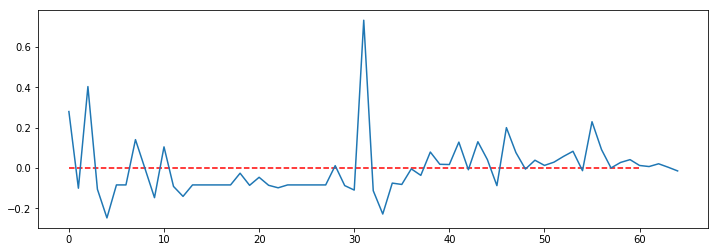

In [ ]:
fig, ax = plt.subplots(figsize= (12,4))
plt.plot(results_mean.resid.values.squeeze()-results_mean.resid.values.mean())
ax.hlines(0, 0, 60, linestyle='--', color='r');
# plt.savefig('ARIMA/Residual Mean_USA.pdf')
plt.show()

## Predictions
Highly recommend to put data in a DataFrame with a DateTimeIndex, because the plot_predict() method really likes dates

### Prediction of internal sample data

Start Date of forecast:  2020-03-16


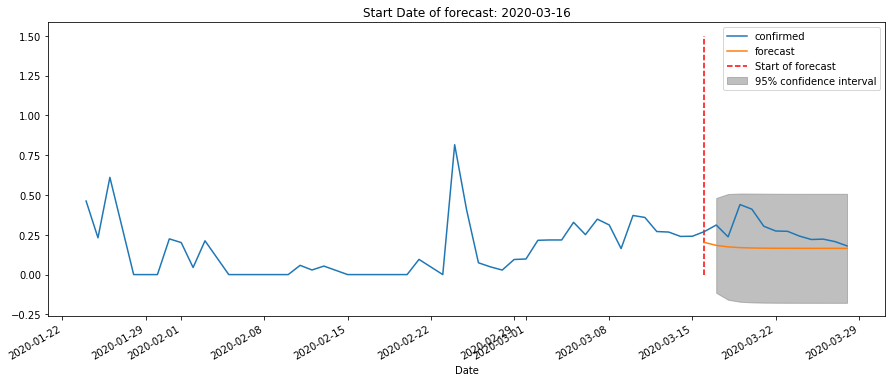

In [ ]:
n = 12

model_test = ARIMA(df_log_minus_mean.dropna()[:-n], (1, 0, 0))
results_mean_test = model_test.fit()

startDate = df_log_minus_mean.dropna()[:-n].index[-1]
print('Start Date of forecast: ', startDate)
endDate=df_log_minus_mean.dropna().index[-1]

fig, ax = plt.subplots(figsize=(15, 6))
df_log_minus_mean.dropna().plot(ax=ax);
ax.vlines(startDate, 0, 1.5, linestyle='--', color='r', label='Start of forecast');
plt.title('Start Date of forecast: '+str(startDate))
ax = results_mean_test.plot_predict(start=startDate,end=endDate, dynamic=True,plot_insample=False,ax=ax)
# plt.savefig('ARIMA/Prediction_internalSample_USA.pdf')
plt.show()

### Prediction of out-of-sample data

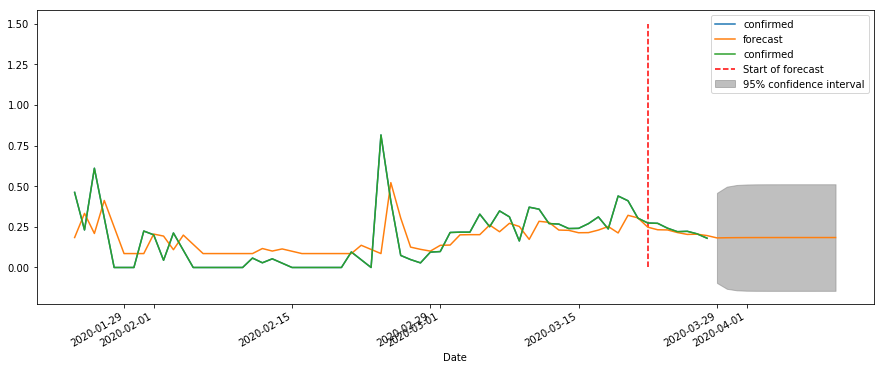

In [ ]:
fig, ax = plt.subplots(figsize=(15, 6))
df_log_minus_mean.dropna().plot(ax=ax);

ax.vlines('2020, 3, 22', 0, 1.5, linestyle='--', color='r', label='Start of forecast');
ax = results_mean.plot_predict(start=results_mean.fittedvalues.index[0],end='2020, 4, 10', ax=ax)
# plt.savefig('ARIMA/Prediction_outOfSample_USA.pdf')
plt.show()

## Convert prediction back to original scale

In [ ]:
prediction_mean=results_mean.predict(start='2020, 1, 24',end='2020, 4, 1')
predictions_ARIMA_diff = pd.Series(prediction_mean, copy = True)
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
Predictions_ARIMA_log = pd.Series(df_log['confirmed'].iloc[0], index = predictions_ARIMA_diff_cumsum.index)
Predictions_ARIMA_log = Predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum, fill_value = 0)
Predictions_ARIMA_new = np.exp(Predictions_ARIMA_log)

aa =Predictions_ARIMA_new.to_frame()
aa.rename(columns={0:'confirmed'}, inplace=True)

trace0 = go.Scatter(y = df['confirmed'],x = df.index,mode = 'markers, lines',name = 'Original Cases')
trace1 = go.Scatter(y = aa['confirmed'],x = aa.index, mode = 'markers,lines',name = 'Predicted Cases')

data = [trace0, trace1]
layout = dict(
    title = ' Future Prediction in USA'+'<br>', 
    xaxis=dict(
        title= dict(text = 'Data',font = dict(color = 'black')),
        tickangle = -45,
        tickfont=dict(size = 4),
        automargin=True)
)

fig = go.Figure(data, layout)
off.iplot(fig)
# fig.write_html('Plots/Future Prediction_USA.html')    # save as html file
# fig.write_image('Plots/Future Prediction_USA.pdf')    # save as image file